# Importing Libraries and Loading Data for analysis

In [30]:
# Importing of all libraries required for the analysis
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import math
import statistics
import matplotlib.pyplot as plt

import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans

from numpy.random import seed

from numpy.random import randn

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
from scipy.stats import ttest_ind

In [4]:
# Loading the data from a csv file
# and displaying the top 5 items from the csv file

df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Exploring the data

In [5]:
# Understanding the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [6]:
# Checking for null values
# ---
# 
df.isnull().sum()
#no nulls observed

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [8]:
#Dropping the utilib and utilib 14 columns as the analysis only focuses on blue cars
df_1 = df.drop(axis= 1, columns=['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',])
df_1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


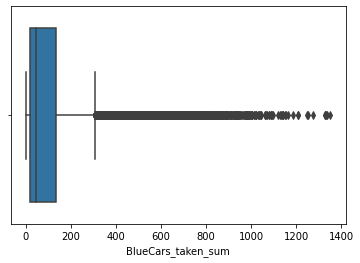

In [9]:
# Checking for outliers in the BlueCars_taken_sum
# 
sns.boxplot(x=df['BlueCars_taken_sum'])

In [10]:
#Dropping the outliers
Q1 =  df_1['BlueCars_taken_sum'].quantile(0.25)
Q3 = df_1['BlueCars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
filterRT = (df_1['BlueCars_returned_sum'] >= Q1 - 1.5 * IQR) & (df_1['BlueCars_returned_sum'] <= Q3 + 1.5 *IQR)
df_2 = df_1.loc[filterRT]  
df_2.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


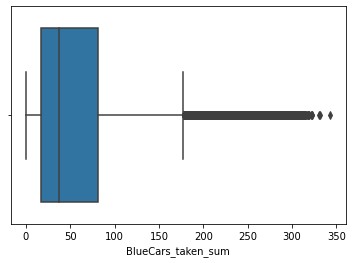

In [11]:
#confirming that outliers have been dropped
sns.boxplot(x=df_2['BlueCars_taken_sum'])

# Univariate Analysis

In [22]:
#Mean, mode,median and quartile for blue cars taken
df_2['BlueCars_taken_sum'].describe()

count    13872.000000
mean        61.918973
std         66.751952
min          0.000000
25%         17.000000
50%         37.000000
75%         81.000000
max        343.000000
Name: BlueCars_taken_sum, dtype: float64

In [23]:
#Mean, mode,median and quartile for blue cars returned
df_2['BlueCars_returned_sum'].describe()

count    13872.000000
mean        61.817258
std         66.282001
min          0.000000
25%         17.000000
50%         37.000000
75%         81.000000
max        307.000000
Name: BlueCars_returned_sum, dtype: float64

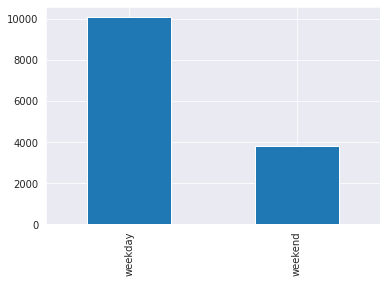

In [16]:
df_2['day_type'].value_counts().plot(kind='bar')

# The plot below shows that the weekdays account for the higher number of blue cars ordered

(array([6582., 3241., 1465.,  819.,  607.,  342.,  230.,  295.,  248.,
          43.]),
 array([  0. ,  34.3,  68.6, 102.9, 137.2, 171.5, 205.8, 240.1, 274.4,
        308.7, 343. ]),
 <a list of 10 Patch objects>)

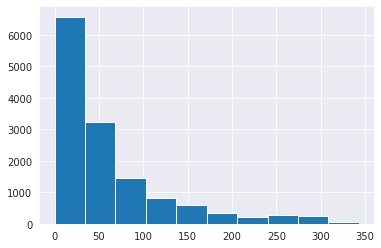

In [17]:
# plotting a histogram of the blue cars taken
plt.hist(df_2['BlueCars_taken_sum'])

# most of the data is observed to be concentrated around the left of the plot(skewed)

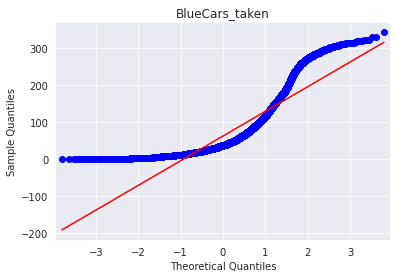

In [19]:
# Testing for normalcy of the data using Q-Q plot
qqplot(df_2['BlueCars_taken_sum'], line='s')
plt.title("BlueCars_taken")
plt.show()

# The data is not distributed around the line meaning the data is not normally distributed

(array([5986., 3449., 1488.,  897.,  590.,  491.,  227.,  190.,  290.,
         264.]),
 array([  0. ,  30.7,  61.4,  92.1, 122.8, 153.5, 184.2, 214.9, 245.6,
        276.3, 307. ]),
 <a list of 10 Patch objects>)

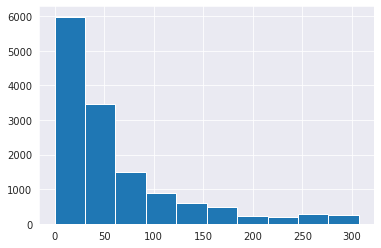

In [18]:
# plotting a histogram of the blue cars returned
plt.hist(df_2['BlueCars_returned_sum'])

# most of the data is observed to be concentrated around the left of the plot(skewed)

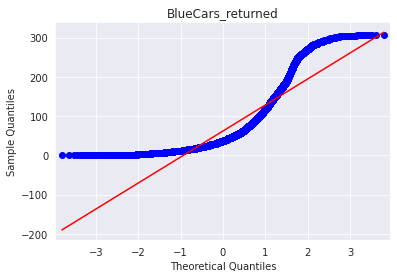

In [21]:
# Testing for normalcy of the data using Q-Q plot
qqplot(df_2['BlueCars_returned_sum'], line='s')
plt.title("BlueCars_returned")
plt.show()
# The data is not distributed around the line meaning the data is not normally distributed

# Bivariate Analysis

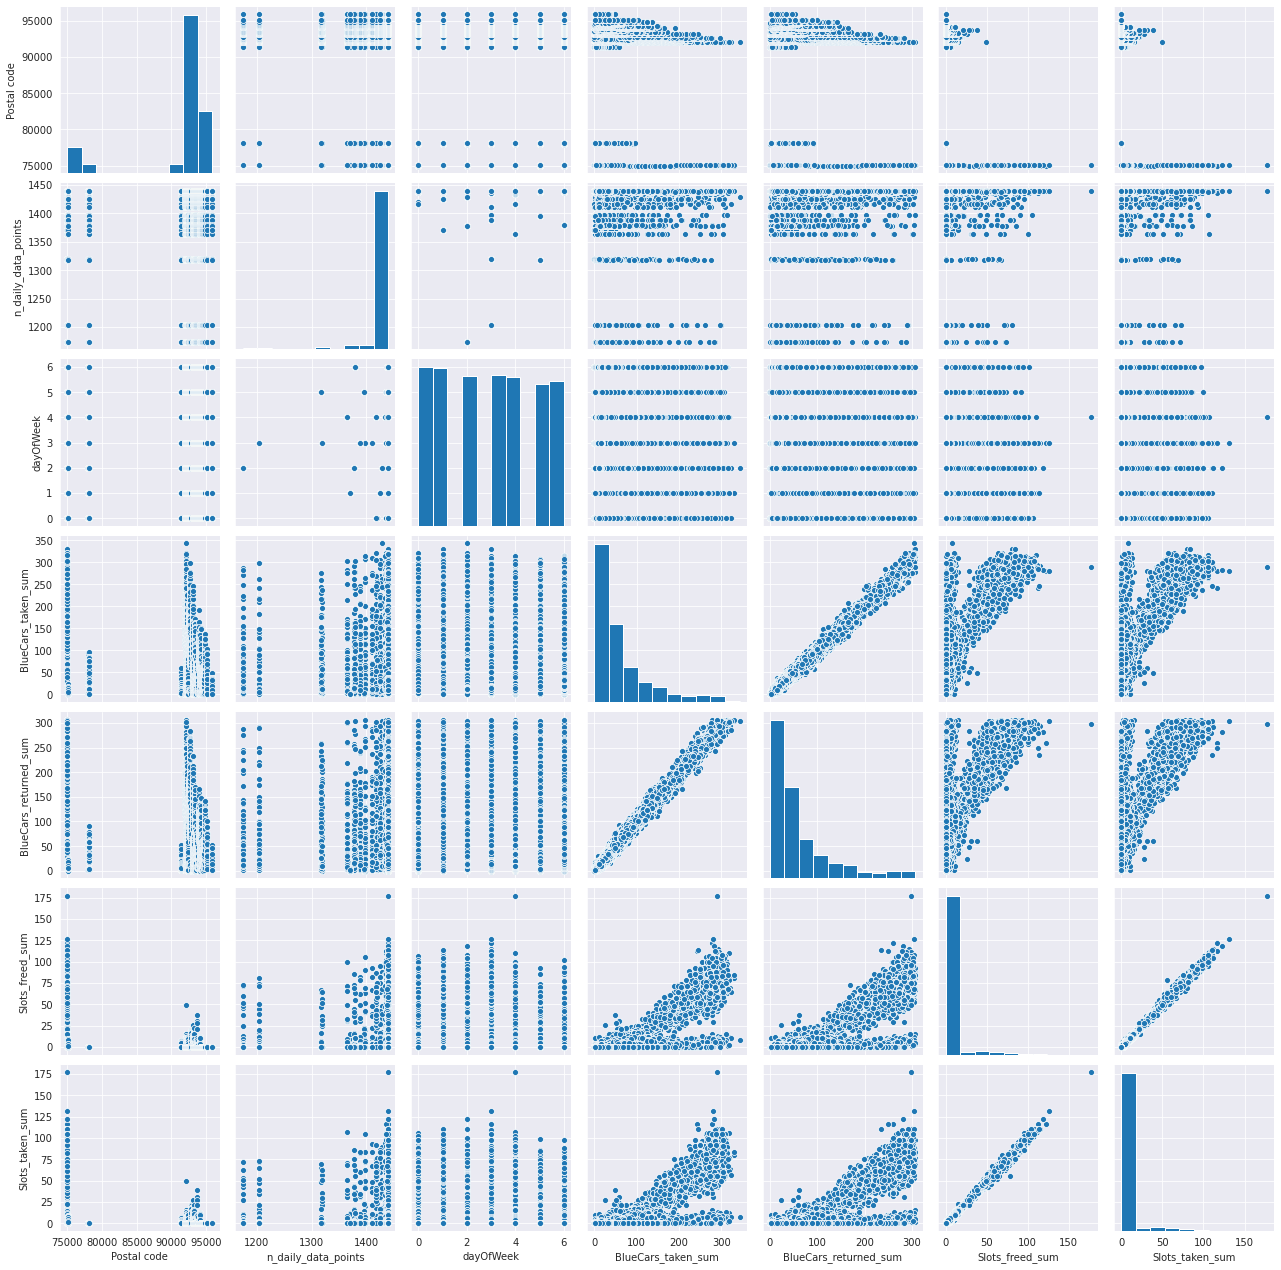

In [24]:
sns.pairplot(df_2)
plt.show()

# HYPOTHESIS TESTING

In [37]:
# Finding the  t-statistic and the p-value
df_15 = df_2[df_2['Postal code'] == 75015]
df_15
df_17 = df_2[df_2['Postal code'] == 75017]
df_17

ttest_ind(df_15['BlueCars_returned_sum'], df_17['BlueCars_returned_sum'])

Ttest_indResult(statistic=1.067906051604825, pvalue=0.3973863709407197)

The data is therefore not sufficient to reject the null hypothesis.

There might be a need to conduct a more detailed investigation to either accept or reject the null hypothesis. 